#Importing required Libraries and Data Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files
uploaded = files.upload()

Saving survey.csv to survey.csv


In [3]:
data = pd.read_csv('survey.csv')
print(data.shape)
print(data.describe())
print(data.info())

(1259, 27)
                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-n

<Axes: >

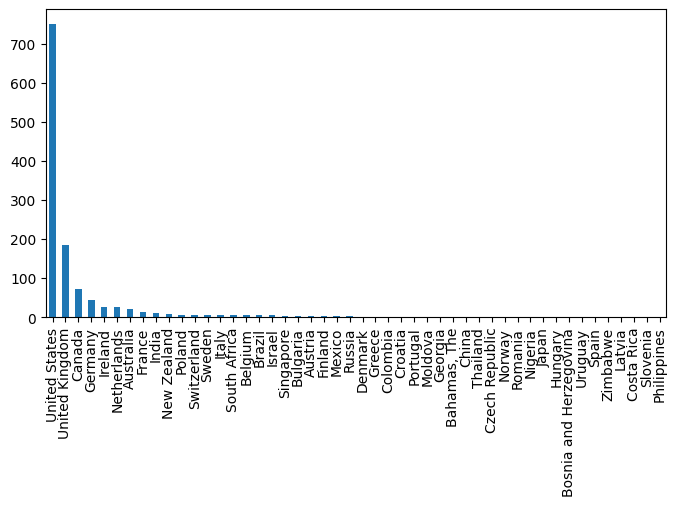

In [4]:
data['Country'].value_counts().plot(kind='bar', figsize=(8,4))

In [5]:
data.drop(['comments','state','Timestamp','Country'], axis= 1, inplace=True)

In [6]:
data.isnull().sum()

Age                            0
Gender                         0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [7]:
data['self_employed'].value_counts()

No     1095
Yes     146
Name: self_employed, dtype: int64

In [8]:
data['self_employed'].fillna('No', inplace=True)

In [9]:
data['work_interfere'].fillna('N/A', inplace=True)

<Axes: >

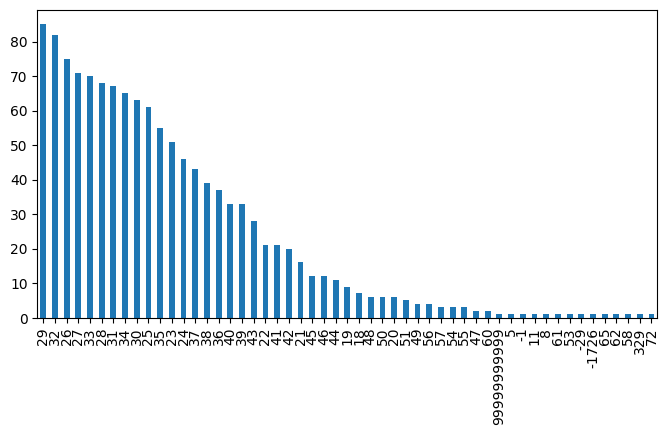

In [10]:
data['Age'].value_counts().plot(kind='bar', figsize=(8,4))

In [11]:
data.drop(data[(data['Age']>60) | (data['Age']<18)].index, inplace=True)

<Axes: >

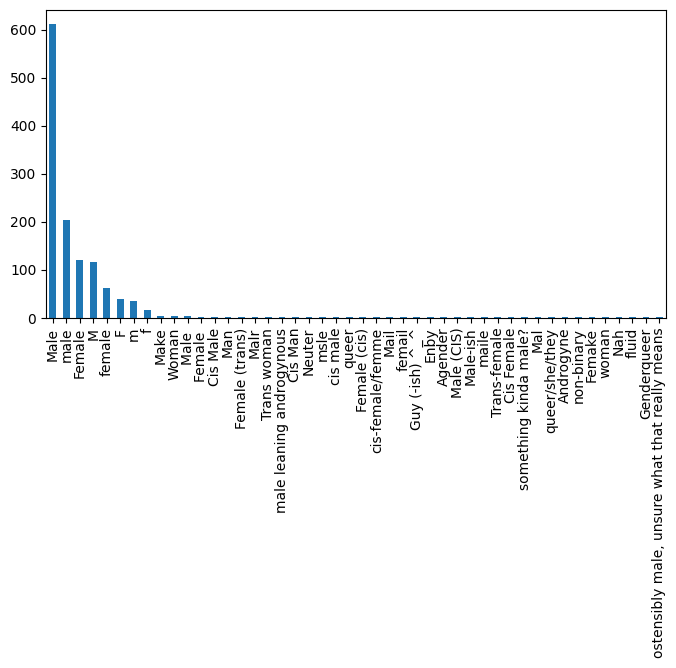

In [12]:
data['Gender'].value_counts().plot(kind='bar', figsize=(8,4))

In [13]:
#Clean 'Gender'
gender = data['Gender'].unique()
print(gender)

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'Malr' 'femail' 'Cis Man'
 'ostensibly male, unsure what that really means']


In [14]:
#Made gender groups
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in data.iterrows():

    if str.lower(col.Gender) in male_str:
        data['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        data['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        data['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

#Get rid of bullshit
stk_list = ['A little about you', 'p']
data = data[~data['Gender'].isin(stk_list)]

print(data['Gender'].unique())

['female' 'male' 'trans']


<ipython-input-15-fb7721de540e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


Text(0.5, 0, 'Age')

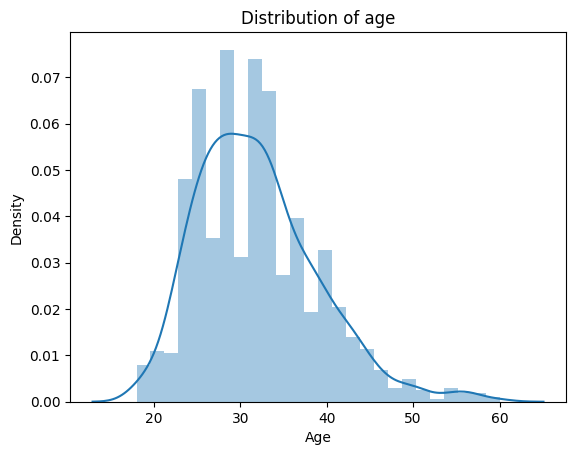

In [15]:
sns.distplot(data['Age'])
plt.title("Distribution of age")
plt.xlabel('Age')

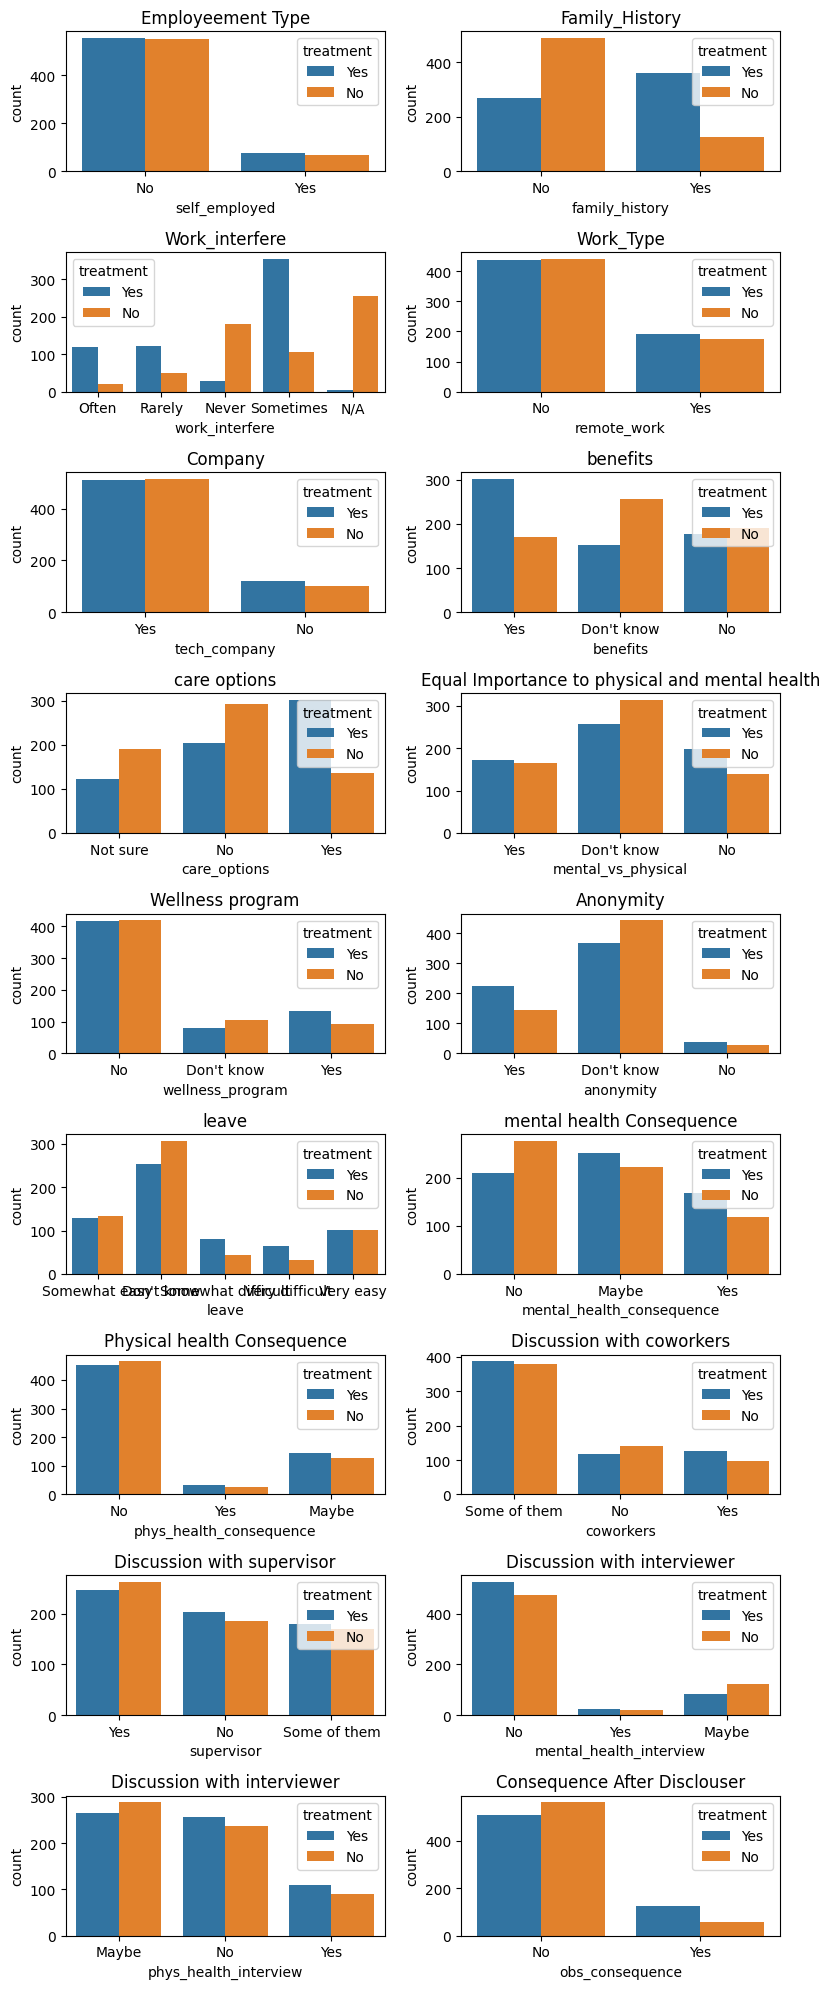

In [16]:
plt.figure(figsize=(8,20))
plt.subplot(9,2,1)
sns.countplot(x=data['self_employed'], hue = data['treatment'])
plt.title("Employeement Type")

plt.subplot(9,2,2)
sns.countplot(x=data['family_history'], hue = data['treatment'])
plt.title("Family_History")

plt.subplot(9,2,3)
sns.countplot(x=data['work_interfere'], hue = data['treatment'])
plt.title("Work_interfere")

plt.subplot(9,2,4)
sns.countplot(x=data['remote_work'], hue = data['treatment'])
plt.title("Work_Type")

plt.subplot(9,2,5)
sns.countplot(x=data['tech_company'], hue = data['treatment'])
plt.title("Company")

plt.subplot(9,2,6)
sns.countplot(x=data['benefits'], hue = data['treatment'])
plt.title("benefits")

plt.subplot(9,2,7)
sns.countplot(x=data['care_options'], hue = data['treatment'])
plt.title('care options')

plt.subplot(9,2,8)
sns.countplot(x=data['mental_vs_physical'], hue = data['treatment'])
plt.title('Equal Importance to physical and mental health')

plt.subplot(9,2,9)
sns.countplot(x=data['wellness_program'], hue = data['treatment'])
plt.title('Wellness program')

plt.subplot(9,2,10)
sns.countplot(x=data['anonymity'], hue = data['treatment'])
plt.title('Anonymity')

plt.subplot(9,2,11)
sns.countplot(x=data['leave'], hue = data['treatment'])
plt.title('leave')

plt.subplot(9,2,12)
sns.countplot(x=data['mental_health_consequence'], hue = data['treatment'])
plt.title('mental health Consequence')

plt.subplot(9,2,13)
sns.countplot(x=data['phys_health_consequence'], hue = data['treatment'])
plt.title('Physical health Consequence')

plt.subplot(9,2,14)
sns.countplot(x=data['coworkers'], hue = data['treatment'])
plt.title('Discussion with coworkers')

plt.subplot(9,2,15)
sns.countplot(x=data['supervisor'], hue = data['treatment'])
plt.title('Discussion with supervisor')

plt.subplot(9,2,16)
sns.countplot(x=data['mental_health_interview'], hue = data['treatment'])
plt.title('Discussion with interviewer')

plt.subplot(9,2,17)
sns.countplot(x=data['phys_health_interview'], hue = data['treatment'])
plt.title('Discussion with interviewer')

plt.subplot(9,2,18)
sns.countplot(x=data['obs_consequence'], hue = data['treatment'])
plt.title('Consequence After Disclouser')

plt.tight_layout()


In [17]:
data.describe(include='all')

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1247.000000,1247,1247,1247,1247,1247,1247,1247,1247,1247,...,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247
unique,NaN,3,2,2,2,5,6,2,2,3,...,3,5,3,3,3,3,3,3,3,2
top,NaN,male,No,No,Yes,Sometimes,6-25,No,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No
freq,NaN,983,1107,759,630,463,288,879,1023,471,...,811,560,487,918,767,509,1000,553,573,1068
mean,31.971131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7.052598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
data.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [19]:
X=data.drop('treatment', axis=1)
y=data['treatment']

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [21]:
ct=ColumnTransformer([('oe', OrdinalEncoder(),['Gender','self_employed',	'family_history','work_interfere',	'no_employees',	'remote_work',	'tech_company',	'benefits','care_options', 'wellness_program', 'seek_help', 'anonymity','leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview','phys_health_interview', 'mental_vs_physical', 'obs_consequence' ])], remainder='passthrough')

In [22]:
X=ct.fit_transform(X)

In [23]:
le= LabelEncoder()
y= le.fit_transform(y)

In [24]:
import joblib
joblib.dump(ct, 'feature_values')

['feature_values']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=40)

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((872, 22), (375, 22), (872,), (375,))

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report, auc

In [28]:
model_dict={}
model_dict['LogisticRegression']=LogisticRegression(solver='liblinear', random_state=49)
model_dict['KNN Classifier']= KNeighborsClassifier()
model_dict['Decision Tree Classifier']=DecisionTreeClassifier(random_state=49)
model_dict['Random Forest Classifier']=RandomForestClassifier(random_state=49)
model_dict['AdaBoost Classifier']=AdaBoostClassifier(random_state=49)
model_dict['Gradient Boosting Classifier']=GradientBoostingClassifier(random_state=49)
model_dict['XGBClassifier']=XGBClassifier(random_state=49)


In [29]:
def model_test(X_train, X_test, y_train, y_test,model,model_name):
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  print('-------------------{}-----------------'.format(model_name))
  print('Score is {}'.format(accuracy))
  print()

In [30]:
for model_name,model in model_dict.items():
  model_test(X_train, X_test, y_train, y_test,model,model_name)

-------------------LogisticRegression-----------------
Score is 0.792

-------------------KNN Classifier-----------------
Score is 0.7333333333333333

-------------------Decision Tree Classifier-----------------
Score is 0.728

-------------------Random Forest Classifier-----------------
Score is 0.8293333333333334

-------------------AdaBoost Classifier-----------------
Score is 0.824

-------------------Gradient Boosting Classifier-----------------
Score is 0.8133333333333334

-------------------XGBClassifier-----------------
Score is 0.7866666666666666



In [31]:
abc=AdaBoostClassifier(random_state=99)
abc.fit(X_train,y_train)
pred_abc=abc.predict(X_test)
print('Accuracy of AdaBoost', accuracy_score(y_test, pred_abc))

Accuracy of AdaBoost 0.824


In [32]:
from sklearn.model_selection import RandomizedSearchCV
params_abc= {'n_estimators': [int(x) for x in np.linspace(start=1, stop=50, num=15)],
             'learning_rate': [(0.97 + x/ 100) for x in range(0,8)],}
abc_random= RandomizedSearchCV(random_state=49, estimator=abc, param_distributions=params_abc, n_iter=50, cv=5, n_jobs=-1)

In [33]:
params_abc

{'n_estimators': [1, 4, 8, 11, 15, 18, 22, 25, 29, 32, 36, 39, 43, 46, 50],
 'learning_rate': [0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04]}

In [34]:
abc_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=99),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.97, 0.98, 0.99, 1.0,
                                                          1.01, 1.02, 1.03,
                                                          1.04],
                                        'n_estimators': [1, 4, 8, 11, 15, 18,
                                                         22, 25, 29, 32, 36, 39,
                                                         43, 46, 50]},
                   random_state=49)

In [35]:
abc_random.best_params_

{'n_estimators': 4, 'learning_rate': 1.0}

In [36]:
abc_tuned=AdaBoostClassifier(random_state=49, n_estimators= 4,learning_rate= 1.0 )
abc_tuned.fit(X_train,y_train)
pred_abc_tuned=abc_tuned.predict(X_test)
print('Accuracy of AdaBoost_tuned', accuracy_score(y_test, pred_abc_tuned))

Accuracy of AdaBoost_tuned 0.8266666666666667


Text(20.72222222222222, 0.5, 'Actual')

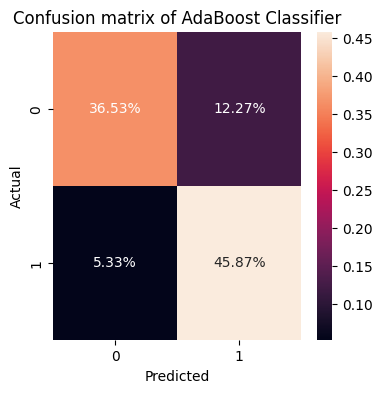

In [37]:
plt.figure(figsize=(4,4))
cf_matrix= confusion_matrix(y_test, pred_abc)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
plt.title('Confusion matrix of AdaBoost Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(20.72222222222222, 0.5, 'Actual')

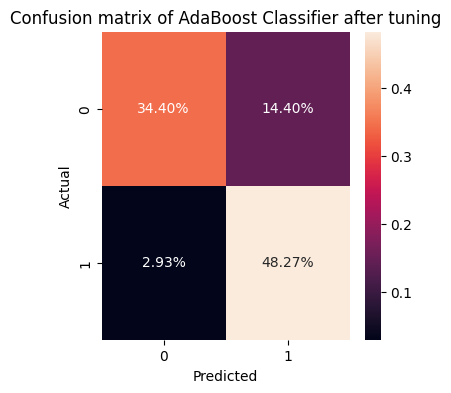

In [38]:
plt.figure(figsize=(4,4))
cf_matrix= confusion_matrix(y_test, pred_abc_tuned)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
plt.title('Confusion matrix of AdaBoost Classifier after tuning')
plt.xlabel('Predicted')
plt.ylabel('Actual')

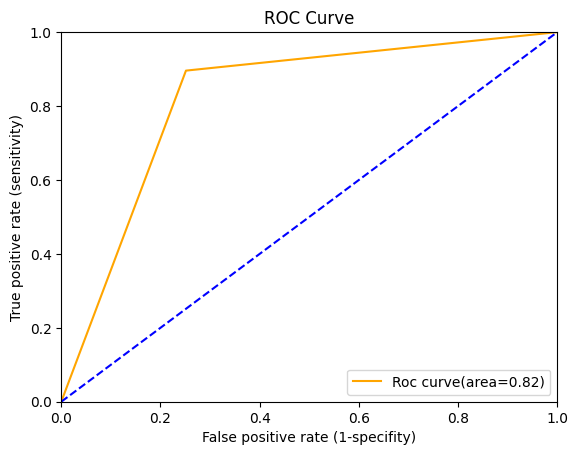

(array([0.        , 0.25136612, 1.        ]),
 array([0.        , 0.89583333, 1.        ]),
 array([2, 1, 0]))

In [39]:
from sklearn import metrics
fpr_abc, tpr_abc, threshold_abc= roc_curve(y_test, pred_abc)
roc_auc_abc= metrics.auc(fpr_abc, tpr_abc)
plt.plot(fpr_abc, tpr_abc, color='orange', label='Roc curve(area=%0.2f)' % roc_auc_abc)
plt.plot([0,1],[0,1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve')
plt.xlabel('False positive rate (1-specifity)')
plt.ylabel('True positive rate (sensitivity)')
plt.legend(loc='lower right')
plt.show()
roc_curve(y_test, pred_abc)

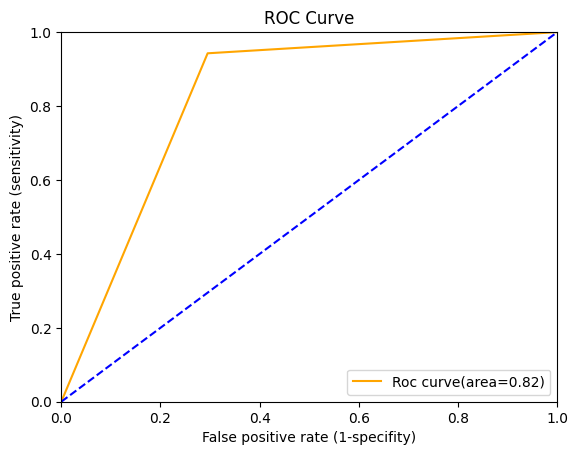

(array([0.        , 0.29508197, 1.        ]),
 array([0.        , 0.94270833, 1.        ]),
 array([2, 1, 0]))

In [40]:
from sklearn import metrics
fpr_abc_tuned, tpr_abc_tuned, threshold_abc_tuned= roc_curve(y_test, pred_abc_tuned)
roc_auc_abc_tuned= metrics.auc(fpr_abc_tuned, tpr_abc_tuned)
plt.plot(fpr_abc_tuned, tpr_abc_tuned, color='orange', label='Roc curve(area=%0.2f)' % roc_auc_abc_tuned)
plt.plot([0,1],[0,1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve')
plt.xlabel('False positive rate (1-specifity)')
plt.ylabel('True positive rate (sensitivity)')
plt.legend(loc='lower right')
plt.show()
roc_curve(y_test, pred_abc_tuned)

In [41]:
print(classification_report(y_test, pred_abc))

              precision    recall  f1-score   support

           0       0.87      0.75      0.81       183
           1       0.79      0.90      0.84       192

    accuracy                           0.82       375
   macro avg       0.83      0.82      0.82       375
weighted avg       0.83      0.82      0.82       375



In [42]:
print(classification_report(y_test, pred_abc_tuned))

              precision    recall  f1-score   support

           0       0.92      0.70      0.80       183
           1       0.77      0.94      0.85       192

    accuracy                           0.83       375
   macro avg       0.85      0.82      0.82       375
weighted avg       0.84      0.83      0.82       375



In [43]:
import pickle


In [44]:
filename='finalized_model.pickle'
pickle.dump(abc_tuned, open(filename,'wb'))

In [46]:
loaded_model=pickle.load(open(filename,'rb'))
a=loaded_model.predict([[1,3,4,5,3,6,7,8,9,3,4,6,8,9,6,5,4,3,2,1,5,6]])
a

array([1])

In [47]:
abc_tuned.predict(X_test)

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,